In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The overall process of this study was as follows:
1.	The NHANES dataset was collected.
2.	The class imbalance in the dataset was handled using oversampling.
3.	Five different machine learning classifiers were trained.
4.	The performance of the models was evaluated using accuracy, sensitivity, specificity, precision, F1 score, and ROC curve.
5.	The results were analyzed.





In [2]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, SMOTE
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import warnings

warnings.filterwarnings("ignore")

# Import Required Data from NHANES - National Health And Nutrition Examination Survey sites


# Demographic Data

In [3]:
# Demographic Data
df_demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT')

In [4]:
df_demo

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,66.0,2.0,1.0,40.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,21586.596728,2.166689e+04,1.0,166.0,3.82
15556,124819.0,66.0,2.0,1.0,2.0,NaN,4.0,4.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,1664.919253,1.838170e+03,2.0,171.0,0.07
15557,124820.0,66.0,2.0,2.0,7.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,14819.783161,1.649781e+04,1.0,157.0,1.22
15558,124821.0,66.0,2.0,1.0,63.0,NaN,4.0,4.0,1.0,1.0,...,2.0,1.0,2.0,2.0,1.0,4666.817952,4.853430e+03,1.0,158.0,3.71


In [5]:
# drop unrelevant features from the Demographic dataset
df_demo1 = df_demo.drop(['SDDSRVYR', 'RIDSTATR', 'RIDRETH1', 'RIDRETH3', 'DMDYRUSZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG','FIAPROXY', 'FIAINTRP',
                         'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA','WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'], axis = 1)

# Dietrary Data

In [6]:
# Import Dietrary Data
df_diet = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DR1IFF.XPT')

In [7]:
df_diet

,SEQN,WTDRD1PP,WTDR2DPP,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,109263.0,7619.483586,1.780807e+04,12.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.941000e+00,3.600000e-02,5.397605e-79,8.380000e-01,8.800000e-02,5.397605e-79,1.200000e-02,5.397605e-79,5.397605e-79,5.397605e-79
1,109263.0,7619.483586,1.780807e+04,10.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.229000e+00,1.300000e-02,5.397605e-79,5.200000e-01,1.300000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,109263.0,7619.483586,1.780807e+04,4.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,5.683000e+00,8.800000e-02,5.000000e-03,3.482000e+00,4.210000e-01,5.000000e-03,2.900000e-02,1.000000e-02,1.000000e-02,5.397605e-79
3,109263.0,7619.483586,1.780807e+04,9.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,1.000000e-02,5.397605e-79,5.397605e-79,6.900000e-02,1.500000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,109263.0,7619.483586,1.780807e+04,13.0,1.0,14.0,2.0,2.0,4.000000e+00,6.0,...,2.382000e+00,1.400000e-02,5.397605e-79,1.209000e+00,1.140000e-01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183905,124821.0,3043.724330,5.397605e-79,5.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
183906,124821.0,3043.724330,5.397605e-79,4.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,1.600000e+00,5.397605e-79,2.000000e-03,2.632000e+00,2.010000e-01,5.397605e-79,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
183907,124821.0,3043.724330,5.397605e-79,3.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,3.900000e-01,4.000000e-03,5.397605e-79,6.530000e-01,7.900000e-02,5.397605e-79,9.000000e-03,1.500000e-02,1.000000e-03,1.600000e-02
183908,124821.0,3043.724330,5.397605e-79,2.0,1.0,81.0,2.0,1.0,5.397605e-79,7.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [8]:
# drop unrelated columns
df_diet1  = df_diet.drop([ 'DR1ILINE', 'DR1DRSTZ', 'DR1EXMER','DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1CCMNM',
        'DR1CCMTX', 'DR1_020', 'DR1_030Z', 'DR1FS', 'DR1_040Z', 'DR1IFDCD','DR1IGRMS', 'DR1IMFAT', 'DR1IPFAT', 'DR1IATOC',
        'DR1IRET',  'DR1IACAR', 'DR1IBCAR', 'DR1ICRYP','DR1ILYCO', 'DR1ILZ',  'DR1INIAC', 'DR1IFOLA', 'DR1IFA', 'DR1IFF',
        'DR1IFDFE', 'DR1ICHL',  'DR1IPHOS','DR1IMAGN', 'DR1IPOTA','DR1ISELE',  'DR1ITHEO',  'DR1IMOIS', 'DR1IS040',
        'DR1IS060', 'DR1IS080', 'DR1IS100', 'DR1IS120', 'DR1IS140', 'DR1IS160','DR1IS180', 'DR1IM161', 'DR1IM181',
        'DR1IM201', 'DR1IM221', 'DR1IP182','DR1IP183', 'DR1IP184', 'DR1IP204', 'DR1IP205', 'DR1IP225', 'DR1IP226', 'DR1ICOPP', 'WTDRD1PP','WTDR2DPP' ], axis = 1)

# Examination Data - Body Measure

In [9]:
# IMport examination Data - Body Measure
df_bmx = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.XPT')

In [10]:
df_bmx1 = df_bmx.drop([ 'BMDSTATS',  'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD',
       'BMIHEAD', 'BMXHT', 'BMIHT',   'BMXLEG', 'BMILEG',
       'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST',
       'BMXHIP', 'BMIHIP'], axis = 1)

# Labratory Data - Insulin

In [11]:
# Import Labratory Data - Insulin
df_insulin = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_INS.XPT')

# Labratory Data - Cholestrol

In [12]:
# Import Labratory Data - Cholestrol data
df_chol = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_TCHOL.XPT')

# Labratory Data - Glucose

In [13]:
# Import Labratory Data - Glucose
df_glu = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_GLU.XPT')

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Merge data

In [14]:
#  Merge all the data based on Sequence Number
df_demo_diet_bmx_ins_chol_glu = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(df_demo1, df_bmx1, on='SEQN', how='inner'),
                                              df_insulin, on='SEQN', how='inner'),
                                             df_chol, on='SEQN', how='inner'),
                                            df_glu, on='SEQN', how='inner'),
                                         df_diet1, on='SEQN', how='inner')

In [15]:
df_demo_diet_bmx_ins_chol_glu.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDEXMON,DMDBORN4,DMDEDUC2,DMDMARTZ,BMXWT,BMXBMI,...,DR1IB12A,DR1IVC,DR1IVD,DR1IVK,DR1ICALC,DR1IIRON,DR1IZINC,DR1ISODI,DR1ICAFF,DR1IALCO
0,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.0,5.397605e-79,0.01,2.0,5.397605e-79,5.397605e-79
1,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,7.0,5.397605e-79,0.02,10.0,5.397605e-79,5.397605e-79
2,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,16.0,5.397605e-79,0.05,21.0,5.397605e-79,5.397605e-79
3,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,9.000000e-01,5.397605e-79,3.700000e+00,11.0,6.300000e-01,0.73,210.0,5.397605e-79,5.397605e-79
4,109264.0,2.0,13.0,NaN,2.0,1.0,NaN,NaN,42.2,17.6,...,5.397605e-79,1.000000e-01,5.397605e-79,8.000000e-01,1.0,4.000000e-02,0.01,23.0,5.397605e-79,5.397605e-79


In [16]:
# null value check
df_demo_diet_bmx_ins_chol_glu.isna().sum()

SEQN              0
RIAGENDR          0
RIDAGEYR          0
RIDAGEMN      68857
RIDEXMON          0
DMDBORN4          0
DMDEDUC2       9150
DMDMARTZ       9150
BMXWT           721
BMXBMI          903
BMDBMIC       59873
WTSAFPRP_x        0
LBXIN          5406
LBDINSI        5406
LBDINLC        5406
LBXTC          4908
LBDTCSI        4908
WTSAFPRP_y        0
LBXGLU         3821
LBDGLUSI       3821
DR1IKCAL          0
DR1IPROT          0
DR1ICARB          0
DR1ISUGR          0
DR1IFIBE          0
DR1ITFAT          0
DR1ISFAT          0
DR1ICHOL          0
DR1IATOA          0
DR1IVARA          0
DR1IVB1           0
DR1IVB2           0
DR1IVB6           0
DR1IVB12          0
DR1IB12A          0
DR1IVC            0
DR1IVD            0
DR1IVK            0
DR1ICALC          0
DR1IIRON          0
DR1IZINC          0
DR1ISODI          0
DR1ICAFF          0
DR1IALCO          0
dtype: int64

In [17]:
df_demo_diet_bmx_ins_chol_glu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        68857 non-null  float64
 1   RIAGENDR    68857 non-null  float64
 2   RIDAGEYR    68857 non-null  float64
 3   RIDAGEMN    0 non-null      float64
 4   RIDEXMON    68857 non-null  float64
 5   DMDBORN4    68857 non-null  float64
 6   DMDEDUC2    59707 non-null  float64
 7   DMDMARTZ    59707 non-null  float64
 8   BMXWT       68136 non-null  float64
 9   BMXBMI      67954 non-null  float64
 10  BMDBMIC     8984 non-null   float64
 11  WTSAFPRP_x  68857 non-null  float64
 12  LBXIN       63451 non-null  float64
 13  LBDINSI     63451 non-null  float64
 14  LBDINLC     63451 non-null  float64
 15  LBXTC       63949 non-null  float64
 16  LBDTCSI     63949 non-null  float64
 17  WTSAFPRP_y  68857 non-null  float64
 18  LBXGLU      65036 non-null  float64
 19  LBDGLUSI    65036 non-nul

# Create final dataset for validation

In [18]:
# Final dataset for execution
df_final = df_demo_diet_bmx_ins_chol_glu.drop(['RIDAGEMN', 'BMDBMIC', 'RIDEXMON', 'DR1IZINC', 'DR1ISODI',
                          'LBDINSI','LBDINLC','LBDTCSI', 'LBXTC','LBXGLU', 'WTSAFPRP_y', 'WTSAFPRP_x',
                          'SEQN',  'DR1ISFAT'], axis = 1)

In [19]:
df_final.shape

(68857, 30)

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  68857 non-null  float64
 1   RIDAGEYR  68857 non-null  float64
 2   DMDBORN4  68857 non-null  float64
 3   DMDEDUC2  59707 non-null  float64
 4   DMDMARTZ  59707 non-null  float64
 5   BMXWT     68136 non-null  float64
 6   BMXBMI    67954 non-null  float64
 7   LBXIN     63451 non-null  float64
 8   LBDGLUSI  65036 non-null  float64
 9   DR1IKCAL  68857 non-null  float64
 10  DR1IPROT  68857 non-null  float64
 11  DR1ICARB  68857 non-null  float64
 12  DR1ISUGR  68857 non-null  float64
 13  DR1IFIBE  68857 non-null  float64
 14  DR1ITFAT  68857 non-null  float64
 15  DR1ICHOL  68857 non-null  float64
 16  DR1IATOA  68857 non-null  float64
 17  DR1IVARA  68857 non-null  float64
 18  DR1IVB1   68857 non-null  float64
 19  DR1IVB2   68857 non-null  float64
 20  DR1IVB6   68857 non-null  fl

In [21]:
df_final.head(15)

,RIAGENDR,RIDAGEYR,DMDBORN4,DMDEDUC2,DMDMARTZ,BMXWT,BMXBMI,LBXIN,LBDGLUSI,DR1IKCAL,...,DR1IVB6,DR1IVB12,DR1IB12A,DR1IVC,DR1IVD,DR1IVK,DR1ICALC,DR1IIRON,DR1ICAFF,DR1IALCO
0,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79
1,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,7.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79
2,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.600000e+01,5.397605e-79,5.397605e-79,5.397605e-79
3,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,1.270000e+02,...,1.570000e-01,5.397605e-79,5.397605e-79,9.000000e-01,5.397605e-79,3.700000e+00,1.100000e+01,6.300000e-01,5.397605e-79,5.397605e-79
4,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,2.000000e+00,...,9.000000e-03,5.397605e-79,5.397605e-79,1.000000e-01,5.397605e-79,8.000000e-01,1.000000e+00,4.000000e-02,5.397605e-79,5.397605e-79
5,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,2.300000e+01,...,2.700000e-02,6.000000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.000000e-02,5.397605e-79,5.397605e-79
6,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,6.300000e+01,...,4.000000e-03,3.000000e-02,5.397605e-79,5.397605e-79,5.397605e-79,1.970000e+01,4.000000e+00,4.000000e-02,5.397605e-79,5.397605e-79
7,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,3.590000e+02,...,1.132000e+00,2.500000e-01,5.397605e-79,5.397605e-79,5.397605e-79,1.380000e+01,2.000000e+01,1.230000e+00,5.397605e-79,5.397605e-79
8,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,5.397605e-79,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
9,2.0,13.0,1.0,NaN,NaN,42.2,17.6,6.05,5.38,9.000000e+00,...,2.000000e-03,3.000000e-02,5.397605e-79,5.397605e-79,1.000000e-01,1.000000e-01,2.300000e+01,1.000000e-02,5.397605e-79,5.397605e-79


##  check Diabetes count, according to research- more than/equal to 7 considered as diabetic

In [22]:
#  check Diabetes count
df_final['Diabetes'] = df_final['LBDGLUSI'] >= 7
df_final['Diabetes'] = (df_final['LBDGLUSI'] >= 7).astype(int)
counts = df_final['Diabetes'].value_counts()
counts

0    59953
1     8904
Name: Diabetes, dtype: int64

<Axes: >

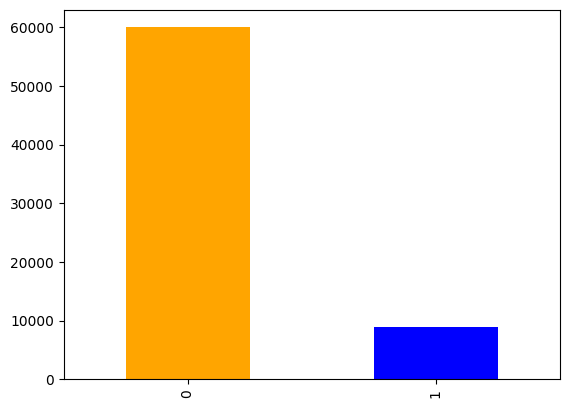

In [68]:
counts.plot(kind='bar', color=['orange', 'blue'])

In [24]:
# Drop unrelated Vitamins data which may not be useful in diabetic prediction
df_final = df_final.drop(['DR1IATOA', 'DR1IVARA', 'DR1IVB1', 'DR1IVB2', 'DR1IVB6', 'DR1IVB12', 'DR1IB12A', 'DR1IVC',
                         'DR1IVD','DR1IVK', 'DMDEDUC2', 'LBDGLUSI', 'DR1IKCAL'], axis = 1)

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68857 entries, 0 to 68856
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  68857 non-null  float64
 1   RIDAGEYR  68857 non-null  float64
 2   DMDBORN4  68857 non-null  float64
 3   DMDMARTZ  59707 non-null  float64
 4   BMXWT     68136 non-null  float64
 5   BMXBMI    67954 non-null  float64
 6   LBXIN     63451 non-null  float64
 7   DR1IPROT  68857 non-null  float64
 8   DR1ICARB  68857 non-null  float64
 9   DR1ISUGR  68857 non-null  float64
 10  DR1IFIBE  68857 non-null  float64
 11  DR1ITFAT  68857 non-null  float64
 12  DR1ICHOL  68857 non-null  float64
 13  DR1ICALC  68857 non-null  float64
 14  DR1IIRON  68857 non-null  float64
 15  DR1ICAFF  68857 non-null  float64
 16  DR1IALCO  68857 non-null  float64
 17  Diabetes  68857 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 10.0 MB


## Check for null values

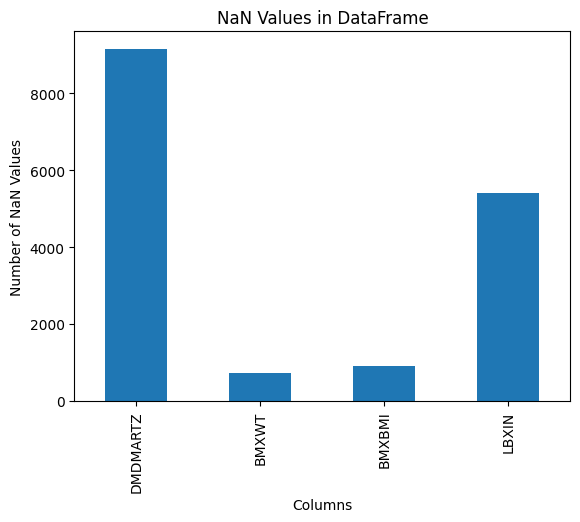

In [26]:
# count number of NaN values in each column
null_counts = df_final.isna().sum()

# select columns with NaN values
null_cols = null_counts[null_counts > 0].index

if len(null_cols) > 0:
    # sort the columns
    null_cols_sorted = sorted(null_cols, key=lambda x: df_final.columns.get_loc(x))

    # create bar graph of NaN counts for selected columns
    null_counts[null_cols_sorted].plot(kind='bar')

    # set labels and title
    plt.xlabel('Columns')
    plt.ylabel('Number of NaN Values')
    plt.title('NaN Values in DataFrame')

    # show graph
    plt.show()
else:
    print("No columns with NaN values found in the DataFrame.")

In [27]:
df_final.isna().sum()

RIAGENDR       0
RIDAGEYR       0
DMDBORN4       0
DMDMARTZ    9150
BMXWT        721
BMXBMI       903
LBXIN       5406
DR1IPROT       0
DR1ICARB       0
DR1ISUGR       0
DR1IFIBE       0
DR1ITFAT       0
DR1ICHOL       0
DR1ICALC       0
DR1IIRON       0
DR1ICAFF       0
DR1IALCO       0
Diabetes       0
dtype: int64

In [28]:
df_final = df_final.dropna(subset=['DMDMARTZ', 'BMXWT','BMXBMI','LBXIN'])

In [29]:
df_final.shape

(54924, 18)

# Add column information
---



In [30]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54924 entries, 19 to 68856
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  54924 non-null  float64
 1   RIDAGEYR  54924 non-null  float64
 2   DMDBORN4  54924 non-null  float64
 3   DMDMARTZ  54924 non-null  float64
 4   BMXWT     54924 non-null  float64
 5   BMXBMI    54924 non-null  float64
 6   LBXIN     54924 non-null  float64
 7   DR1IPROT  54924 non-null  float64
 8   DR1ICARB  54924 non-null  float64
 9   DR1ISUGR  54924 non-null  float64
 10  DR1IFIBE  54924 non-null  float64
 11  DR1ITFAT  54924 non-null  float64
 12  DR1ICHOL  54924 non-null  float64
 13  DR1ICALC  54924 non-null  float64
 14  DR1IIRON  54924 non-null  float64
 15  DR1ICAFF  54924 non-null  float64
 16  DR1IALCO  54924 non-null  float64
 17  Diabetes  54924 non-null  int64  
dtypes: float64(17), int64(1)
memory usage: 8.0 MB


# Change column names to more readable names

In [31]:
# UPDATE THE COLUMN NAME
current_column_names = df_final.columns.tolist()
new_column_names = ['GENDER','AGE','BORN_YR','MARITAL','WEIGHT','BMI','GLUCSE','PROT','CARB','SUGR','FIBE','FAT','CHOL','CALC','IRON','CAFE','ALCOH','DIABTES']

df_final.rename(columns=dict(zip(current_column_names, new_column_names)), inplace=True)
# df_final

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

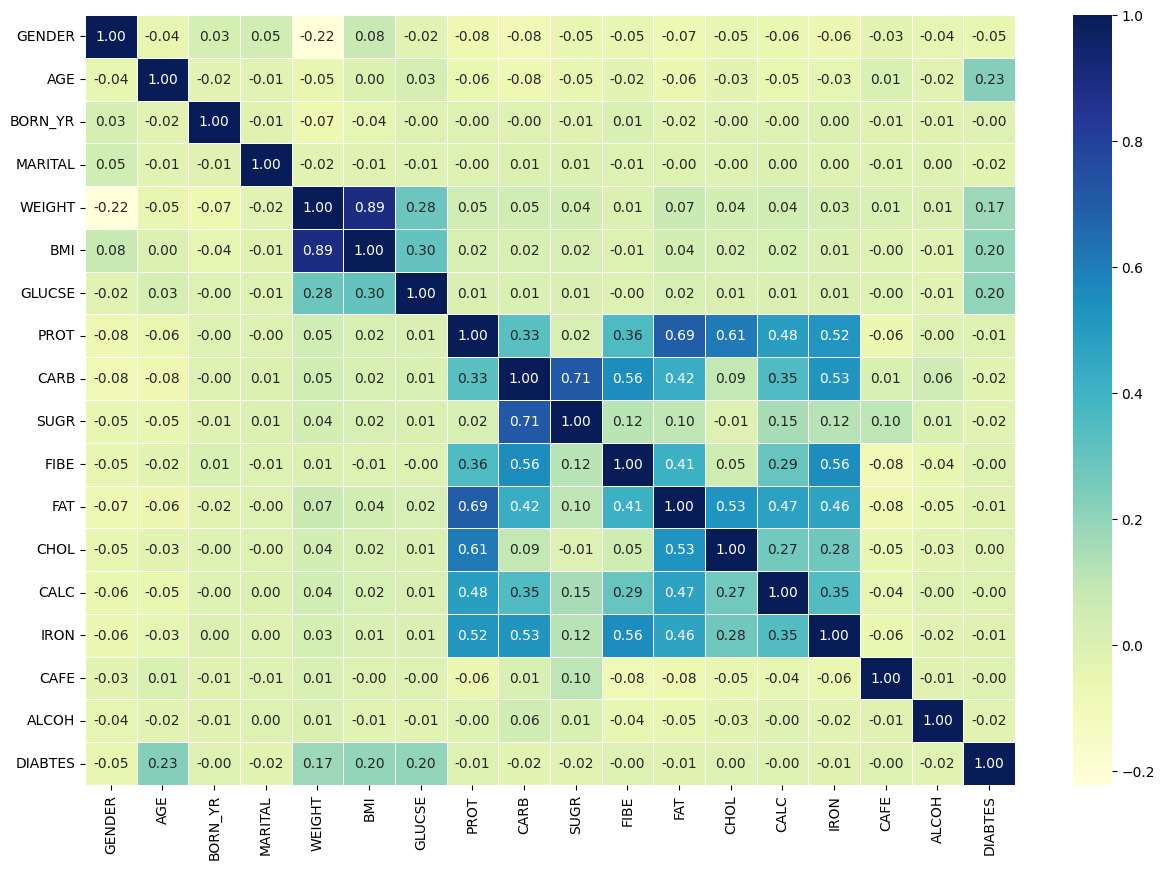

In [32]:
# Confusion Matrix
corr_matrix = df_final.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

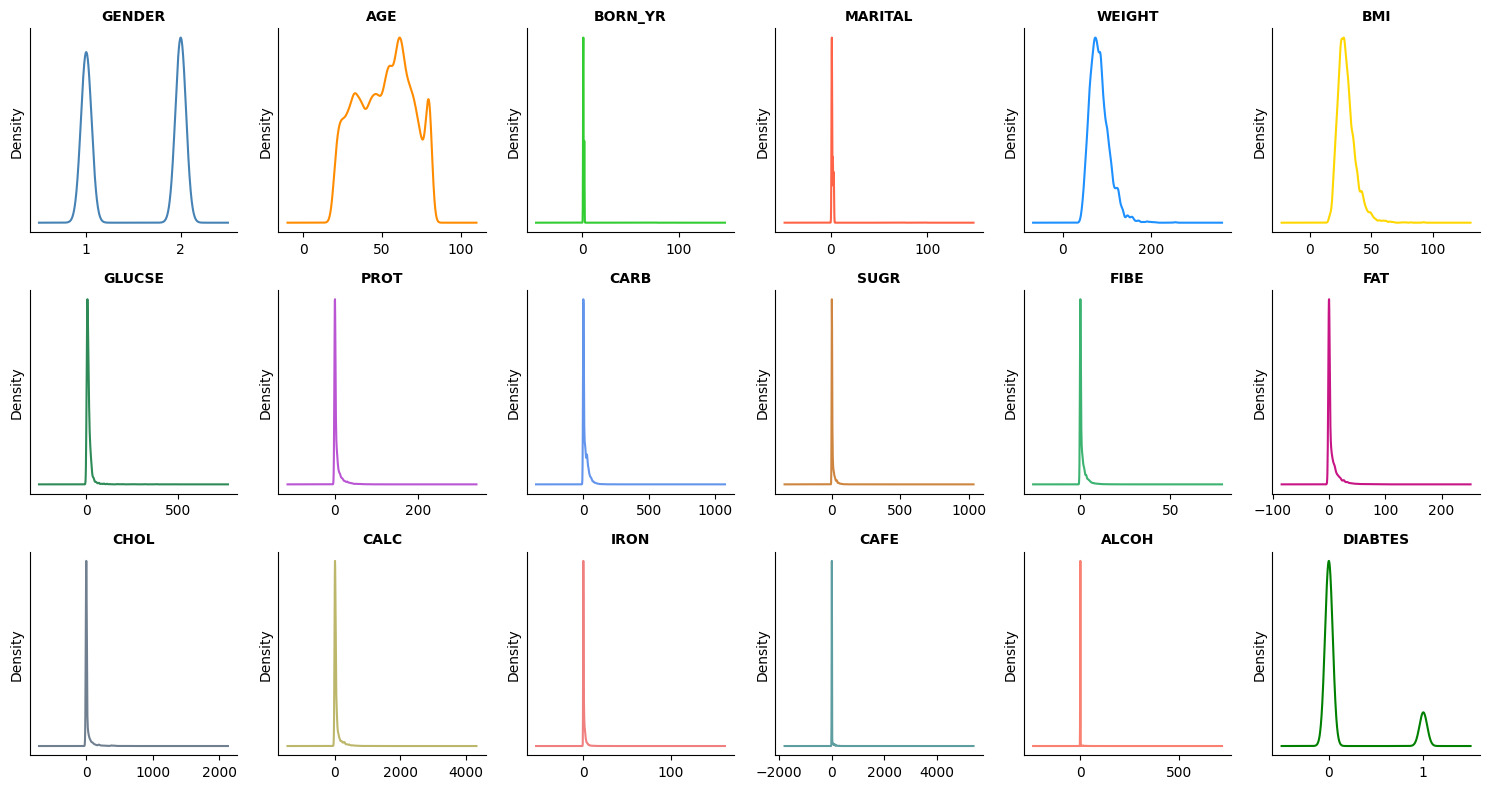

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame with 20 features
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Define a color palette for the density plots
colors = ['steelblue', 'darkorange', 'limegreen', 'tomato', 'dodgerblue', 'gold',
          'seagreen', 'mediumorchid', 'cornflowerblue', 'peru', 'mediumseagreen',
          'mediumvioletred', 'slategray', 'darkkhaki', 'lightcoral', 'cadetblue', 'salmon',
          'green', 'blue', 'black' ]

# Plot each feature as a density plot
for i, column in enumerate(df_final.columns):
    df_final[column].plot(kind='density', ax=axes[i], color=colors[i])
    axes[i].set_title(column, fontsize=10, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].tick_params(left=False, labelleft=False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Target variable

In [34]:
# there are few categorical features too , will be using SMOTE_NC
X = df_final.drop('DIABTES', axis = 1)
y = df_final['DIABTES']
# to remove "ValueError: Unknown label type: 'continuous'" error, hanging the data type for target variable
y = y.astype('int')

In [35]:
X.head()
X.shape

(54924, 17)

In [36]:
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X, y, test_size=0.3, random_state=42)

# With imbalanced data

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

## Logistic Regression

In [37]:
# Logistic Regression
lr_im = LogisticRegression(random_state=42)
lr_im.fit(X_train_im, y_train_im)

preds_ilr = lr_im.predict(X_test_im)

accuracy_lr = lr_im.score(X_test_im, y_test_im)
precision_lr = precision_score(y_test_im, preds_ilr)
recall_lr = recall_score(y_test_im, preds_ilr)
f1_lr = f1_score(y_test_im, preds_ilr)

print(f'Accuracy: {accuracy_lr: .2f}\nPrecision: {precision_lr: .2f}\nRecall: {recall_lr: .2f}\nF1_score{f1_lr: .2f}')




Accuracy:  0.85
Precision:  0.65
Recall:  0.05
F1_score 0.09


## Random Forest

In [38]:
# Random Forest
rfc_im = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc_im.fit(X_train_im, y_train_im)

# Make predictions on the test data
y_pred_im = rfc_im.predict(X_test_im)


# Evaluate model performance
# print("Accuracy:", accuracy_score(y_test_im, y_pred_im))

accuracy_rfc = accuracy_score(y_test_im, y_pred_im)
precision_rfc = precision_score(y_test_im, y_pred_im)
recall_rfc = recall_score(y_test_im, y_pred_im)
f1_score_rfc = f1_score(y_test_im, y_pred_im)

print(f'Accuracy: {accuracy_rfc: .2f}\nPrecision: {precision_rfc: .2f}\nRecall: {recall_rfc: .2f}\nF1_score{f1_score_rfc: .2f}')

Accuracy:  0.99
Precision:  1.00
Recall:  0.92
F1_score 0.96


## K-Nearest Neighbors

In [39]:
# KNN
knn_im = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier to the training data
knn_im.fit(X_train_im, y_train_im)

# Making predictions on the test data
y_pred_ik = knn_im.predict(X_test_im)

# Calculating the accuracy of the model
accuracy_knn_im = accuracy_score(y_test_im, y_pred_ik)
# print("Accuracy:", accuracy_knn_im)

precision_knn = precision_score(y_test_im, y_pred_im)
recall_knn = recall_score(y_test_im, y_pred_im)
f1_score_knn = f1_score(y_test_im, y_pred_im)

print(f'Accuracy: {accuracy_knn_im: .2f}\nPrecision: {precision_knn: .2f}\nRecall: {recall_knn: .2f}\nF1_score{f1_score_knn: .2f}')

Accuracy:  0.85
Precision:  1.00
Recall:  0.92
F1_score 0.96


## CatBoost

In [40]:
# catboost
catboost_im = CatBoostClassifier()

# # fit the model to the training data
catboost_im.fit(X_train_im, y_train_im, verbose=False)

# # make predictions on the test data
y_pred_ic = catboost_im.predict(X_test_im)

# # evaluate the model performance
accuracy_catb_im = accuracy_score(y_test_im, y_pred_ic)
# print(accuracy_catb_im)

precision_cat = precision_score(y_test_im, y_pred_ic)
recall_cat = recall_score(y_test_im, y_pred_ic)
f1_score_cat = f1_score(y_test_im, y_pred_ic)

print(f'Accuracy: {accuracy_catb_im: .2f}\nPrecision: {precision_cat: .2f}\nRecall: {recall_cat: .2f}\nF1_score{f1_score_cat: .2f}')

Accuracy:  0.98
Precision:  1.00
Recall:  0.89
F1_score 0.94


## XGBoost

In [41]:
# XGBoost

xgboost_im = XGBClassifier()

# # train the model
xgboost_im.fit(X_train_im, y_train_im)

# # make predictions
y_pred_ix = xgboost_im.predict(X_test_im)

# # evaluate the model
accuracy_xgb_im = accuracy_score(y_test_im, y_pred_im)
# print(accuracy_xgb_im)

precision_xgb = precision_score(y_test_im, y_pred_ix)
recall_xgb = recall_score(y_test_im, y_pred_ix)
f1_score_xgb = f1_score(y_test_im, y_pred_ix)

print(f'Accuracy: {accuracy_xgb_im: .2f}\nPrecision: {precision_xgb: .2f}\nRecall: {recall_xgb: .2f}\nF1_score{f1_score_xgb: .2f}')

Accuracy:  0.99
Precision:  1.00
Recall:  0.97
F1_score 0.99


# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# HANDLING DATA IMBALANCE WITH SMOTENC

### SMOTE-NC is most suitable for the datasets containing both numerical and categorical features. The dataset is a mix of categorical data like gender and continuous data like BMI, I used SMOTE-NC to handle class-imbalanced data.

In [43]:
# categorical_features
categorical_features = [0, 2, 3, 4]
# Using SMOTE-NC for unbalance data - since data has categorical and numerical data, using SMOTE-NC instead of SMOTE
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


In [44]:
# split test & train data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [45]:
# New
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Performance of ML models after handling imbalanced data

## Logistic Regression

In [52]:
# Create a logistic regression model and fit it
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Make predictions on a test set (assuming X_test is the test set)
# y_pred = lr.predict(X_test)

preds_smt_lr = lr.predict(X_test)

# # evaluate the model
accuracy_smt_lr = accuracy_score(y_test, preds_smt_lr)

precision_smt_lr = precision_score(y_test, preds_smt_lr)
recall_smt_lr = recall_score(y_test, preds_smt_lr)
f1_score_smt_lr = f1_score(y_test, preds_smt_lr)

print(f'Accuracy: {accuracy_smt_lr: .2f}\nPrecision: {precision_smt_lr: .2f}\nRecall: {recall_smt_lr: .2f}\nF1_score{f1_score_smt_lr: .2f}')
print("\nClassification Report:\n", classification_report(y_test, preds_smt_lr))

Accuracy:  0.68
Precision:  0.67
Recall:  0.72
F1_score 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67     13985
           1       0.67      0.72      0.69     13896

    accuracy                           0.68     27881
   macro avg       0.68      0.68      0.68     27881
weighted avg       0.68      0.68      0.68     27881



In [53]:
print(lr.score(X_test, y_test))

0.6832251353968652


## Random Forest

In [55]:
%%time
# random Forest

# Create random forest classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
preds_smt_rfc = rfc.predict(X_test)



# Evaluate model performance
# print("Accuracy:", accuracy_score(y_test, y_pred))


# # evaluate the model
accuracy_smt_rfc = accuracy_score(y_test, preds_smt_rfc)
precision_smt_rfc = precision_score(y_test, preds_smt_rfc)
recall_smt_rfc = recall_score(y_test, preds_smt_rfc)
f1_score_smt_rfc = f1_score(y_test, preds_smt_rfc)

print(f'Accuracy: {accuracy_smt_rfc: .2f}\nPrecision: {precision_smt_rfc: .2f}\nRecall: {recall_smt_rfc: .2f}\nF1_score{f1_score_smt_rfc: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_smt_rfc))

Accuracy:  0.98
Precision:  0.98
Recall:  0.97
F1_score 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     13985
           1       0.98      0.97      0.98     13896

    accuracy                           0.98     27881
   macro avg       0.98      0.98      0.98     27881
weighted avg       0.98      0.98      0.98     27881

CPU times: user 17.1 s, sys: 13.6 ms, total: 17.2 s
Wall time: 17.1 s


## K-Nearest Neighbors

In [56]:
%%time
# KNN
# Creating a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Making predictions on the test data
preds_smt_knn = knn.predict(X_test)

# # Calculating the accuracy of the model
# accuracy_knn = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy_knn)


# # evaluate the model
accuracy_smt_knn = accuracy_score(y_test, preds_smt_knn)
precision_smt_knn = precision_score(y_test, preds_smt_knn)
recall_smt_knn = recall_score(y_test, preds_smt_knn)
f1_score_smt_knn = f1_score(y_test, preds_smt_knn)

print(f'Accuracy: {accuracy_smt_knn: .2f}\nPrecision: {precision_smt_knn: .2f}\nRecall: {recall_smt_knn: .2f}\nF1_score{f1_score_smt_knn: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_smt_knn))

Accuracy:  0.86
Precision:  0.81
Recall:  0.93
F1_score 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85     13985
           1       0.81      0.93      0.87     13896

    accuracy                           0.86     27881
   macro avg       0.87      0.86      0.86     27881
weighted avg       0.87      0.86      0.86     27881

CPU times: user 14.9 s, sys: 80.5 ms, total: 15 s
Wall time: 9.32 s


In [57]:
# pip install catboost
# pip install xgboost

## CatBoost Calssifier
#### CATboost reduces the need for many hyperparameter tuning and reduces the chance of overfitting

In [58]:
%%time


# # create a CatBoostClassifier object
catboost = CatBoostClassifier()

# # fit the model to the training data
catboost.fit(X_train, y_train, verbose=False)

# # make predictions on the test data
preds_smt_ctb = catboost.predict(X_test)

# # # evaluate the model performance
# accuracy_catb = accuracy_score(y_test, y_pred)
# print(accuracy_catb)


# # evaluate the model
accuracy_smt_ctb = accuracy_score(y_test, preds_smt_ctb)
precision_smt_ctb = precision_score(y_test, preds_smt_ctb)
recall_smt_ctb = recall_score(y_test, preds_smt_ctb)
f1_score_smt_ctb = f1_score(y_test, preds_smt_ctb)

print(f'Accuracy: {accuracy_smt_ctb: .2f}\nPrecision: {precision_smt_ctb: .2f}\nRecall: {recall_smt_ctb: .2f}\nF1_score{f1_score_smt_ctb: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_smt_ctb))

Accuracy:  0.98
Precision:  0.99
Recall:  0.96
F1_score 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13985
           1       0.99      0.96      0.98     13896

    accuracy                           0.98     27881
   macro avg       0.98      0.98      0.98     27881
weighted avg       0.98      0.98      0.98     27881

CPU times: user 34 s, sys: 974 ms, total: 35 s
Wall time: 20.3 s


In [ ]:
# %%time
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

## XGBoost
#### Extreme Gradient Boosting is referred to as XGBoost which reduces the overfitting of a model by introducing a regularization parameter as well as improving the speed and efficiency of the model.

In [62]:
%%time
# # create an XGBClassifier object
xgboost = XGBClassifier()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# # train the model
xgboost.fit(X_train, y_train)

# # make predictions
preds_smt_xgb = xgboost.predict(X_test)


# # evaluate the model
accuracy_smt_xgb = accuracy_score(y_test, preds_smt_xgb)
precision_smt_xgb = precision_score(y_test, preds_smt_xgb)
recall_smt_xgb = recall_score(y_test, preds_smt_xgb)
f1_score_smt_xgb = f1_score(y_test, preds_smt_xgb)

print(f'Accuracy: {accuracy_smt_xgb: .2f}\nPrecision: {precision_smt_xgb: .2f}\nRecall: {recall_smt_xgb: .2f}\nF1_score{f1_score_smt_xgb: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_smt_xgb))


Accuracy:  0.97
Precision:  0.98
Recall:  0.96
F1_score 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     13985
           1       0.98      0.96      0.97     13896

    accuracy                           0.97     27881
   macro avg       0.97      0.97      0.97     27881
weighted avg       0.97      0.97      0.97     27881

CPU times: user 20.2 s, sys: 56.8 ms, total: 20.3 s
Wall time: 14.9 s


# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Feature Importance

In [60]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.9 MB/s eta 0:00:00


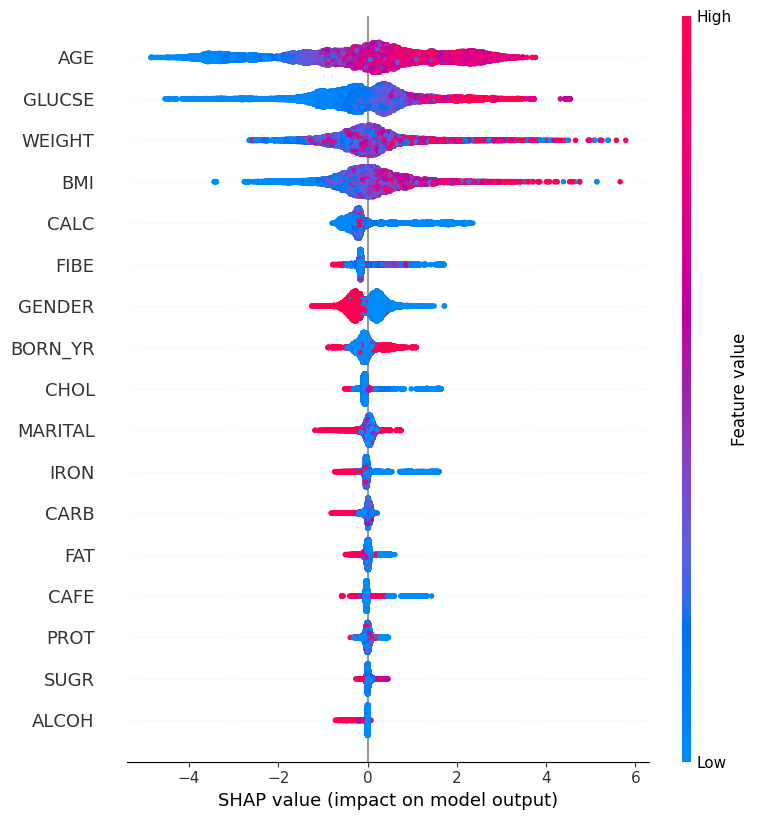

In [61]:
import shap

# Create a TreeExplainer object
explainer = shap.TreeExplainer(catboost)

# Compute SHAP values for a set of instances

shap_values = explainer.shap_values(X_test)

# Visualize the summary of SHAP values
shap.summary_plot(shap_values, X_test)

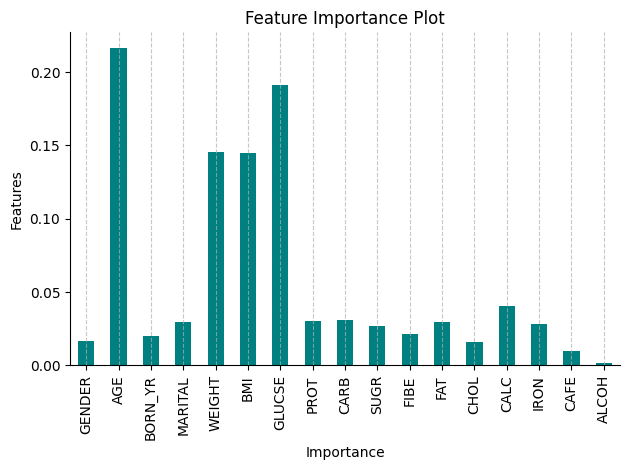

In [63]:
# print(rfc.feature_importances_)


# Generate the bar plot
ax = pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='bar', color='teal')

ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance Plot')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Improve performance with hyperparameter tuning using cross-validation and grid search

## Logistic Regression with hyperparameter

In [66]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga']}

# Create grid search object
grid_search = GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, n_jobs=-1)



In [67]:
%%time
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)



CPU times: user 3.49 s, sys: 350 ms, total: 3.84 s
Wall time: 4min 23s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']})

In [71]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the best model
preds_hypr_lr = grid_search.predict(X_test)

# # evaluate the model
accuracy_hypr_lr = accuracy_score(y_test, preds_hypr_lr)
precision_hypr_lr = precision_score(y_test, preds_hypr_lr)
recall_hypr_lr = recall_score(y_test, preds_hypr_lr)
f1_score_hypr_lr = f1_score(y_test, preds_hypr_lr)

print(f'Accuracy: {accuracy_hypr_lr: .2f}\nPrecision: {precision_hypr_lr: .2f}\nRecall: {recall_hypr_lr: .2f}\nF1_score{f1_score_hypr_lr: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_hypr_lr))

Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy:  0.71
Precision:  0.70
Recall:  0.74
F1_score 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70     13985
           1       0.70      0.74      0.72     13896

    accuracy                           0.71     27881
   macro avg       0.71      0.71      0.71     27881
weighted avg       0.71      0.71      0.71     27881



## Random Forest with hyperparameter

In [72]:
from sklearn.model_selection import RandomizedSearchCV

rfc_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

# Perform randomized search with cross-validation as GridSearch is taking long time to execute
random_search = RandomizedSearchCV(rfc, param_distributions=rfc_param_grid, n_iter=10, cv=5)


In [73]:
%%time
# Perform grid search with cross-validation
random_search.fit(X_train, y_train)

# Make predictions on the test data
preds_hypr_rfc = rfc.predict(X_test)


# # evaluate the model
accuracy_hypr_rfc = accuracy_score(y_test, preds_hypr_rfc)
precision_hypr_rfc = precision_score(y_test, preds_hypr_rfc)
recall_hypr_rfc = recall_score(y_test, preds_hypr_rfc)
f1_score_hypr_rfc = f1_score(y_test, preds_hypr_rfc)

print(f'Accuracy: {accuracy_hypr_rfc: .2f}\nPrecision: {precision_hypr_rfc: .2f}\nRecall: {recall_hypr_rfc: .2f}\nF1_score{f1_score_hypr_rfc: .2f}')

print("\nClassification Report:\n", classification_report(y_test, preds_hypr_rfc))

Accuracy:  0.98
Precision:  0.98
Recall:  0.97
F1_score 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     13985
           1       0.98      0.97      0.98     13896

    accuracy                           0.98     27881
   macro avg       0.98      0.98      0.98     27881
weighted avg       0.98      0.98      0.98     27881

CPU times: user 13min 27s, sys: 1.12 s, total: 13min 28s
Wall time: 14min 12s


In [86]:
# Create a dataframe with the metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'CatBoost'],

    'Accuracy_imb': [accuracy_lr, accuracy_rfc, accuracy_knn_im, accuracy_xgb_im, accuracy_catb_im],
    'Accuracy_smt': [accuracy_smt_lr, accuracy_smt_rfc, accuracy_smt_knn, accuracy_smt_xgb, accuracy_smt_ctb],
    'Accuracy_hypr': [accuracy_hypr_lr, accuracy_hypr_rfc, 'N/A', 'N/A', 'N/A'],
    'Precision_imb': [precision_lr, precision_rfc, precision_knn, precision_xgb, precision_cat],
    'Precision_smt': [precision_smt_lr, precision_smt_rfc, precision_smt_knn, precision_smt_xgb, precision_smt_ctb],
    'Precision_hypr': [precision_hypr_lr, precision_hypr_rfc,'N/A', 'N/A', 'N/A'],

    'Recall_imb': [recall_lr, recall_rfc, recall_knn, recall_xgb, recall_cat],
    'Recall_smt': [recall_smt_lr, recall_smt_rfc, recall_smt_knn, recall_smt_xgb, recall_smt_ctb],
    'Recall_hypr': [recall_hypr_lr, recall_hypr_rfc, 'N/A', 'N/A', 'N/A'],
    'F1 Score_imb': [f1_lr, f1_score_rfc, f1_score_knn, f1_score_xgb, f1_score_cat],
    'F1 Score_smt': [f1_score_smt_lr, f1_score_smt_rfc, f1_score_smt_knn, f1_score_smt_xgb, f1_score_smt_ctb],
    'F1 Score_hypr': [f1_score_hypr_lr, f1_score_hypr_rfc,'N/A', 'N/A', 'N/A']
})

# Display the dataframe
print(metrics_df)

                 Model  Accuracy_imb  Accuracy_smt Accuracy_hypr  Precision_imb  Precision_smt Precision_hypr  Recall_imb  Recall_smt Recall_hypr  F1 Score_imb  F1 Score_smt F1 Score_hypr
0  Logistic Regression      0.845734      0.683225      0.708619       0.651961       0.670966       0.695927    0.051075    0.715098    0.737694      0.094729      0.692329      0.716202
1        Random Forest      0.987195      0.976077      0.976077       0.999582       0.980181       0.980181    0.919355    0.971647    0.971647      0.957792      0.975895      0.975895
2                  KNN      0.851013      0.857502           N/A       0.999582       0.811281            N/A    0.919355    0.930556         N/A      0.957792      0.866834           N/A
3              XGBoost      0.987195      0.971199           N/A       0.999210       0.979421            N/A    0.971966    0.962435         N/A      0.985400      0.970854           N/A
4             CatBoost      0.982219      0.977296          

In [87]:
# Transpose the DataFrame to switch columns and rows
metrics_df = metrics_df.transpose()

# Set the first row as the column headers
new_header = metrics_df.iloc[0]
metrics_df = metrics_df[1:]
metrics_df.columns = new_header

# Reset the index
metrics_df = metrics_df.reset_index()

# Rename the index column to 'Metrics'
metrics_df = metrics_df.rename(columns={'index': 'Metrics'})

# #Set display options to show all columns in a single line
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)

# Display the modified DataFrame
print(metrics_df)

Model         Metrics Logistic Regression Random Forest       KNN   XGBoost  CatBoost
0        Accuracy_imb            0.845734      0.987195  0.851013  0.987195  0.982219
1        Accuracy_smt            0.683225      0.976077  0.857502  0.971199  0.977296
2       Accuracy_hypr            0.708619      0.976077       N/A       N/A       N/A
3       Precision_imb            0.651961      0.999582  0.999582   0.99921       1.0
4       Precision_smt            0.670966      0.980181  0.811281  0.979421  0.989229
5      Precision_hypr            0.695927      0.980181       N/A       N/A       N/A
6          Recall_imb            0.051075      0.919355  0.919355  0.971966  0.887481
7          Recall_smt            0.715098      0.971647  0.930556  0.962435  0.964954
8         Recall_hypr            0.737694      0.971647       N/A       N/A       N/A
9        F1 Score_imb            0.094729      0.957792  0.957792    0.9854  0.940387
10       F1 Score_smt            0.692329      0.97589

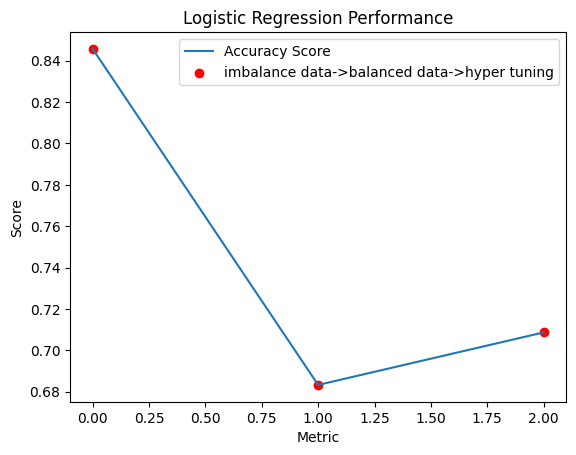

In [96]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the metrics
ax.plot([accuracy_lr, accuracy_smt_lr, accuracy_hypr_lr], label='Accuracy Score')

# Add points A, B, and C
ax.scatter([0, 1, 2], [accuracy_lr, accuracy_smt_lr, accuracy_hypr_lr], color='red', marker='o', label='imbalance data->balanced data->hyper tuning')

# Set the title and labels
ax.set_title('Logistic Regression Performance')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

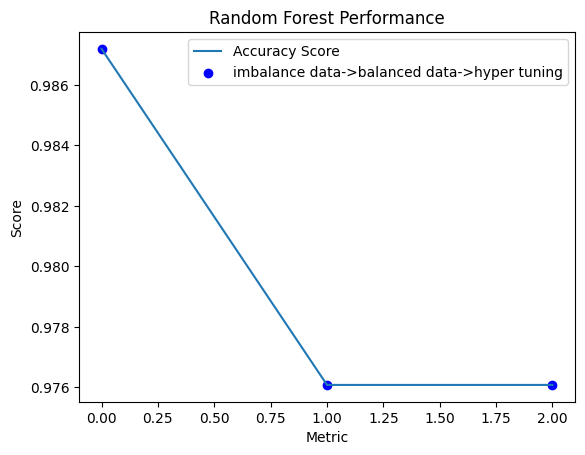

In [103]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the metrics
ax.plot([accuracy_rfc, accuracy_smt_rfc, accuracy_hypr_rfc], label='Accuracy Score')

# Add points A, B, and C
ax.scatter([0, 1, 2], [accuracy_rfc, accuracy_smt_rfc, accuracy_hypr_rfc], color='blue', marker='o', label='imbalance data->balanced data->hyper tuning')

# Set the title and labels
ax.set_title('Random Forest Performance')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

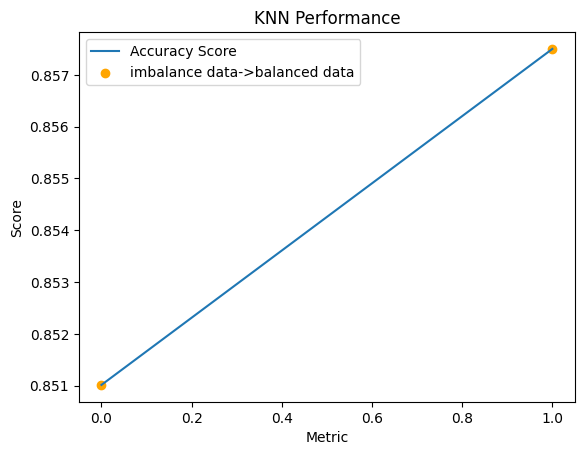

In [108]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the metrics
ax.plot([accuracy_knn_im, accuracy_smt_knn], label='Accuracy Score')

# Add points A, B, and C
ax.scatter([0, 1], [accuracy_knn_im, accuracy_smt_knn], color='orange', marker='o', label='imbalance data->balanced data')

# Set the title and labels
ax.set_title('KNN Performance')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

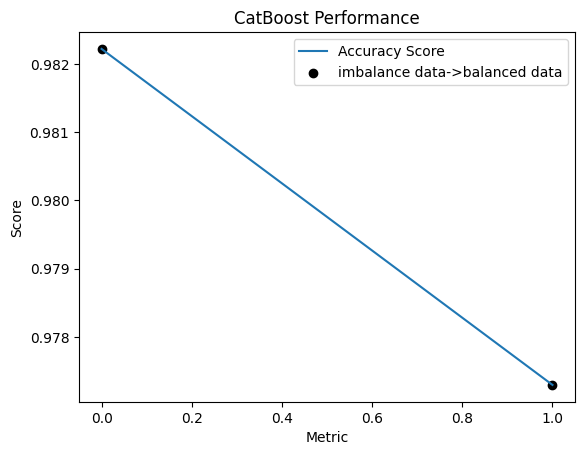

In [112]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the metrics
ax.plot([accuracy_catb_im, accuracy_smt_ctb], label='Accuracy Score')

# Add points A, B, and C
ax.scatter([0, 1], [accuracy_catb_im, accuracy_smt_ctb], color='black', marker='o', label='imbalance data->balanced data')

# Set the title and labels
ax.set_title('CatBoost Performance')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

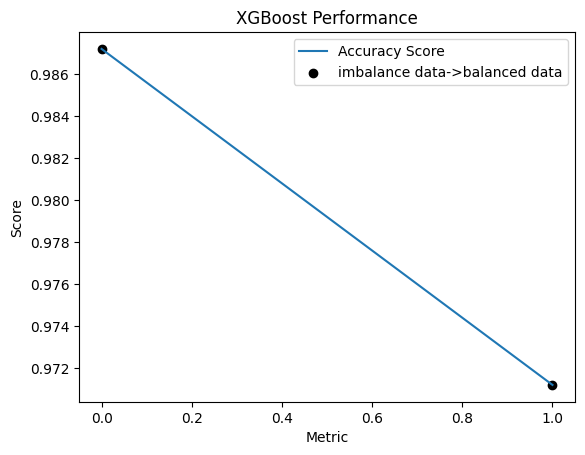

In [113]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the metrics
ax.plot([accuracy_xgb_im, accuracy_smt_xgb], label='Accuracy Score')

# Add points A, B, and C
ax.scatter([0, 1], [accuracy_xgb_im, accuracy_smt_xgb], color='black', marker='o', label='imbalance data->balanced data')

# Set the title and labels
ax.set_title('XGBoost Performance')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

### With use of hyperparameters, there is no improvements to the scores due to the overfitting of data.

# Create ROC Curve

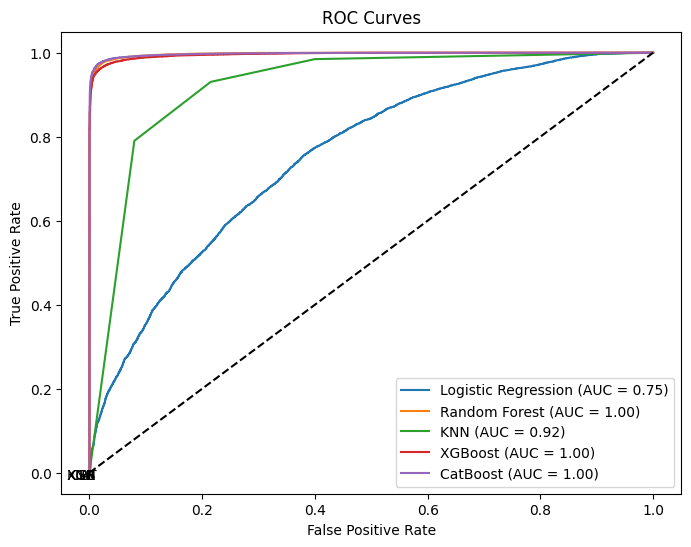

In [75]:
from sklearn.metrics import roc_curve, auc
#  ROC Curve based on the data after handling imbalance


# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Random Forest

rf_probs = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# K-Nearest Neighbors (KNN)
knn_probs = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# XGBoost
xgb_probs = xgboost.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# CatBoost
ctb_probs = catboost.predict_proba(X_test)[:, 1]
ctb_fpr, ctb_tpr, _ = roc_curve(y_test, ctb_probs)
ctb_auc = auc(ctb_fpr, ctb_tpr)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(ctb_fpr, ctb_tpr, label=f'CatBoost (AUC = {ctb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing

# Annotate points with index or label
models = ['LR', 'RF', 'KNN', 'XGB', 'CAT']
for i in range(len(models)):
    plt.annotate(models[i], (lr_fpr[i], lr_tpr[i]), textcoords="offset points", xytext=(5, -5), ha='right')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()